# Superconducting charge qubit 

Ref:  QuTiP lecture: Superconducting Josephson charge qubits by J.R. Johansson (robert@riken.jp)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from qutip import *

## Introduction

The Hamiltonian for a Josephson charge qubit is

$\displaystyle H = \sum_n 4 E_C (n_g - n)^2 \left|n\right\rangle\left\langle n\right| - \frac{1}{2}E_J\sum_n\left(\left|n+1\right\rangle\left\langle n\right| + \left|n\right\rangle\left\langle n+1\right| \right)$

where $E_C$ is the charge energy, $E_J$ is the Josephson energy, and $\left| n\right\rangle$ is the charge state with $n$ Cooper-pairs on the island that makes up the charge qubit.

#### References

 * [J. Koch et al, Phys. Rec. A 76, 042319 (2007)](http://link.aps.org/doi/10.1103/PhysRevA.76.042319)
 * [Y.A. Pashkin et al, Quantum Inf Process 8, 55 (2009)](http://dx.doi.org/10.1007/s11128-009-0101-5)

## Helper functions

Below we will repeatedly need to obtain the charge qubit Hamiltonian for different parameters, and to plot the eigenenergies, so here we define two functions to do these tasks. 

In [3]:
def hamiltonian(Ec, Ej, N, ng):
    """
    Return the charge qubit hamiltonian as a Qobj instance.
    """
    m = np.diag(4 * Ec * (np.arange(-N,N+1)-ng)**2) + 0.5 * Ej * (np.diag(-np.ones(2*N), 1) + 
                                                               np.diag(-np.ones(2*N), -1))
    return Qobj(m)

In [4]:
def plot_energies(ng_vec, energies, ymax=(20, 3)):
    """
    Plot energy levels as a function of bias parameter ng_vec.
    """
    fig, axes = plt.subplots(1,2, figsize=(16,6))

    for n in range(energies.shape[1]):
        axes[0].plot(ng_vec, energies[:,n])
        
    axes[0].set_ylim(energies[0,:].min() * 1.3, ymax[0]) # modified, JK
    axes[0].set_xlabel(r'$n_g$', fontsize=18)
    axes[0].set_ylabel(r'$E_n$', fontsize=18)

    for n in range(len(energies[0,:])):
        axes[1].plot(ng_vec, (energies[:,n]-energies[:,0])/(energies[:,1]-energies[:,0]))
    axes[1].set_ylim(-0.2, ymax[1])
    axes[1].set_xlabel(r'$n_g$', fontsize=18)
    axes[1].set_ylabel(r'$(E_n-E_0)/(E_1-E_0)$', fontsize=18)
    return fig, axes

## Energy level and charge dispersion

In [5]:
N = 10
Ec = 0.39 # GHz
Ej = 10

In [6]:
ng_vec = np.linspace(-3, 3, 200)

energies = np.array([hamiltonian(Ec, Ej, N, ng).eigenenergies() for ng in ng_vec])

(<matplotlib.figure.Figure at 0x7f040016a9e8>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f040016a0f0>,
       dtype=object))

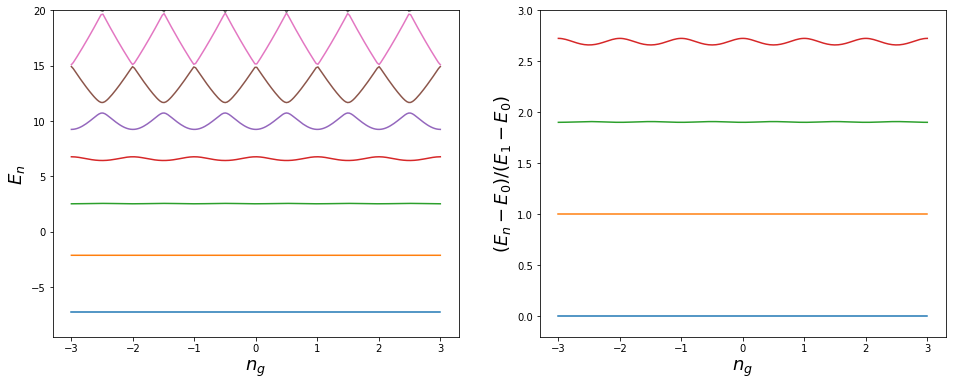

In [7]:
plot_energies(ng_vec, energies)

f01 max - f01 min = 1.810 MHz
Average of f01 max and min = 5.1616 GHz


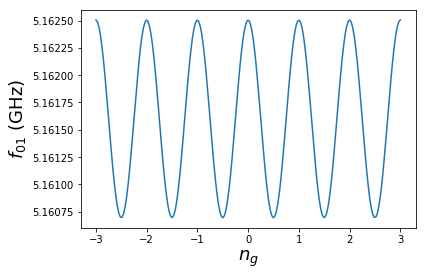

In [8]:
# Just plot f01 vs ng
f01 = energies[:,1] - energies[:,0]

plt.plot(ng_vec, f01)
plt.xlabel(r'$n_g$', fontsize=18)
plt.ylabel(r'$f_{01}$ (GHz)', fontsize=18)

print(f'f01 max - f01 min = {(f01.max()-f01.min())*1000 :.3f} MHz')
print(f'Average of f01 max and min = {(f01.max()+f01.min())/2 :.4f} GHz')